In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt',header=None)

X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt',header=None)

features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, names=['id', 'feature_name'])
activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity_name'])

X_train.columns = features['feature_name']
X_test.columns = features['feature_name']

print("Dimensiones de los datos:")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

C:\Users\nicon\AppData\Local\Temp\ipykernel_21800\2684210714.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\nicon\AppData\Local\Temp\ipykernel_21800\2684210714.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


Dimensiones de los datos:
(7352, 561)
(7352, 1)
(2947, 561)
(2947, 1)


C:\Users\nicon\AppData\Local\Temp\ipykernel_21800\2684210714.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, names=['id', 'feature_name'])
C:\Users\nicon\AppData\Local\Temp\ipykernel_21800\2684210714.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity_name'])


feature_name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [48]:
y_train_counts = y_train.value_counts().sort_index()
y_test_counts = y_test.value_counts().sort_index()

class_distribution = pd.DataFrame({
    "Train": y_train_counts.values,
    "Test": y_test_counts.values
}, index=activities["activity_name"])

class_distribution

,Train,Test
activity_name,,
WALKING,1226,496
WALKING_UPSTAIRS,1073,471
WALKING_DOWNSTAIRS,986,420
SITTING,1286,491
STANDING,1374,532
LAYING,1407,537


In [49]:
print("Valores nulos en X_train:", X_train.isnull().sum().sum())
print("Valores nulos en X_test:", X_test.isnull().sum().sum())

print("Rango de valores en X_train:")
X_train.describe().T[['min', 'max']]

Valores nulos en X_train: 0
Valores nulos en X_test: 0
Rango de valores en X_train:


,min,max
feature_name,,
tBodyAcc-mean()-X,-1.000000,1.000000
tBodyAcc-mean()-Y,-1.000000,1.000000
tBodyAcc-mean()-Z,-1.000000,1.000000
tBodyAcc-std()-X,-1.000000,1.000000
tBodyAcc-std()-Y,-0.999873,0.916238
...,...,...
"angle(tBodyGyroMean,gravityMean)",-1.000000,0.998702
"angle(tBodyGyroJerkMean,gravityMean)",-1.000000,0.996078
"angle(X,gravityMean)",-1.000000,1.000000


In [ ]:
acc_features = X_train.filter(regex="Acc")
gyro_features = X_train.filter(regex="Gyro")

low_variance_features = X_train.var()[X_train.var() < 0.01]

print("Acelerómetro - Media Global:", acc_features.mean().mean())
print("Giroscopio - Media Global:", gyro_features.mean().mean())
print("Cantidad de características con baja varianza:", len(low_variance_features))

low_variance_features

Acelerómetro - Media Global: -0.5087652484356199
Giroscopio - Media Global: -0.5125882938368747
Cantidad de características con baja varianza: 37


feature_name
tBodyAcc-mean()-X                   0.004937
tBodyAcc-mean()-Y                   0.001665
tBodyAcc-mean()-Z                   0.003208
tGravityAcc-std()-X                 0.006084
tGravityAcc-std()-Y                 0.008366
tGravityAcc-mad()-X                 0.005887
tGravityAcc-mad()-Y                 0.008180
tGravityAcc-iqr()-X                 0.005378
tGravityAcc-iqr()-Y                 0.007570
fBodyAcc-bandsEnergy()-25,32        0.007780
fBodyAcc-bandsEnergy()-33,40        0.007159
fBodyAcc-bandsEnergy()-33,48        0.009689
fBodyAcc-bandsEnergy()-25,48        0.007824
fBodyAccJerk-bandsEnergy()-57,64    0.003367
fBodyAccJerk-bandsEnergy()-57,64    0.008928
fBodyAccJerk-bandsEnergy()-25,32    0.007487
fBodyAccJerk-bandsEnergy()-33,40    0.006514
fBodyAccJerk-bandsEnergy()-33,48    0.009088
fBodyAccJerk-bandsEnergy()-25,48    0.007637
fBodyGyro-bandsEnergy()-25,32       0.007621
fBodyGyro-bandsEnergy()-41,48       0.009440
fBodyGyro-bandsEnergy()-49,56       0.0072

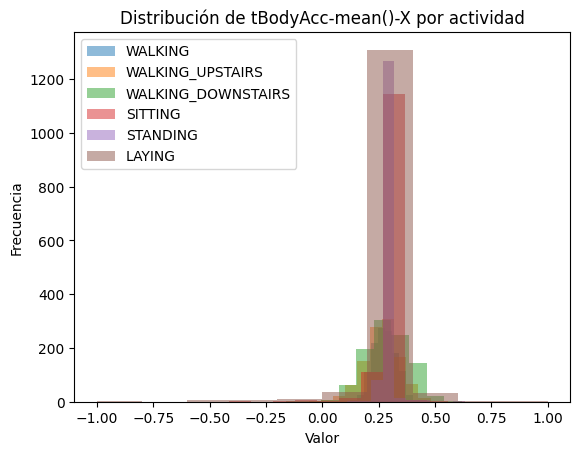

'tBodyAcc-mean()-X'

In [ ]:
sample_feature = X_train.columns[0]

plt.figure()
for i, act in enumerate(activities["id"], 1):
    plt.hist(X_train[y_train[0] == act][sample_feature], alpha=0.5, label=activities["activity_name"][i-1])

plt.legend()
plt.title(f"Distribución de {sample_feature} por actividad")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\nicon\AppData\Local\Temp\ipykernel_21800\3032735845.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=activities["activity_name"], showfliers=False)


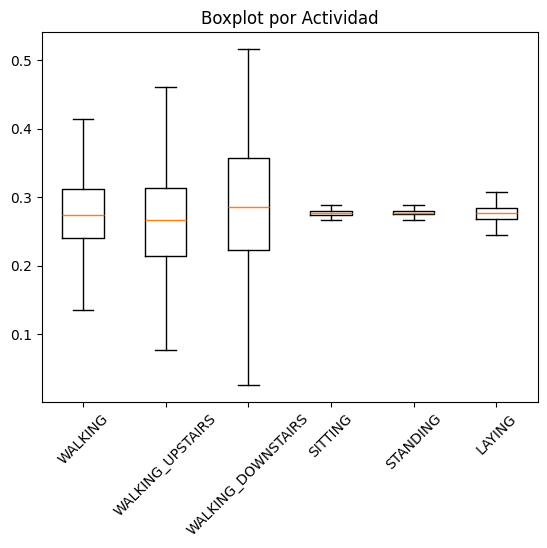

In [58]:
plt.figure()
data = [X_train[y_train[0] == act][sample_feature] for act in activities["id"]]
plt.boxplot(data, labels=activities["activity_name"], showfliers=False)
plt.xticks(rotation=45)
plt.title("Boxplot por Actividad")
plt.show()


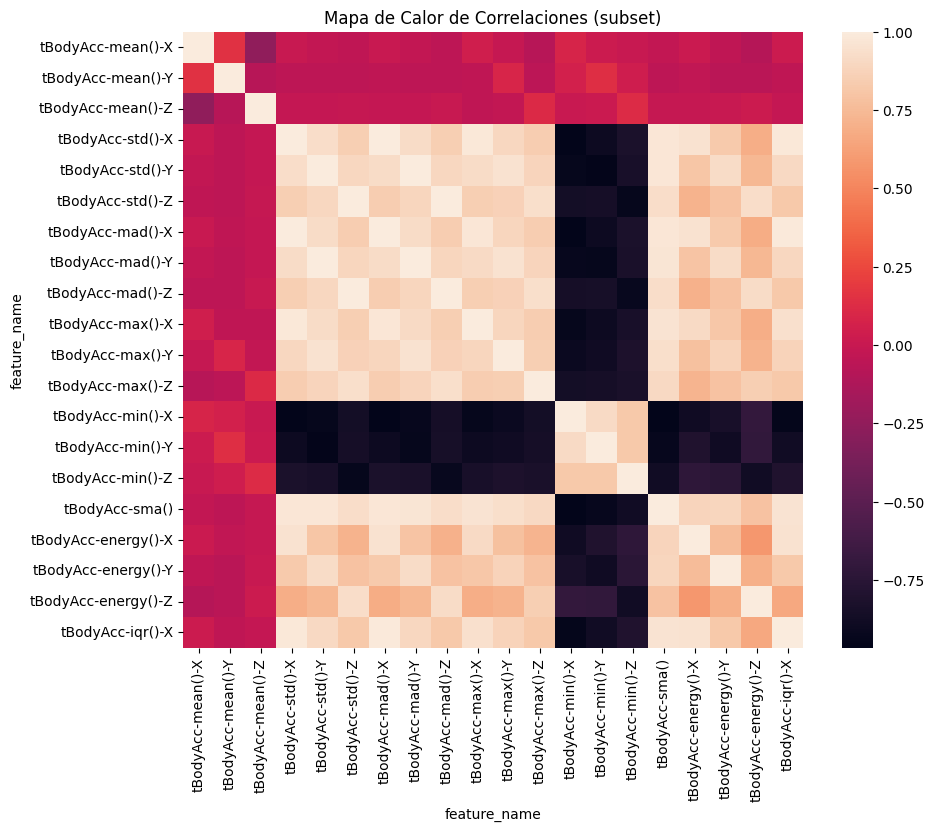

In [62]:
subset = X_train.iloc[:, :20]
corr_matrix = subset.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.title("Mapa de Calor de Correlaciones (subset)")
plt.show()


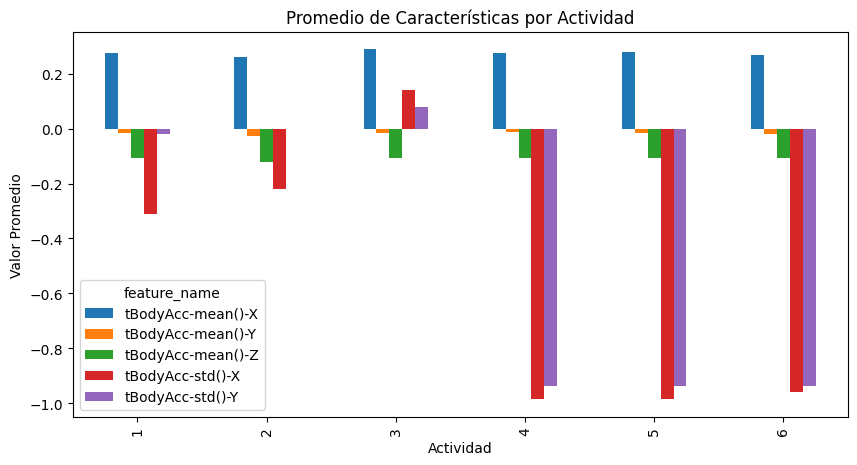

In [63]:
mean_values = X_train.groupby(y_train[0]).mean().iloc[:, :5]

mean_values.plot(kind="bar", figsize=(10,5))
plt.title("Promedio de Características por Actividad")
plt.xlabel("Actividad")
plt.ylabel("Valor Promedio")
plt.show()


In [68]:
print("Verificacion de normalizacion:")
print(X_train.mean().mean(), X_train.std().mean())
print("")
outliers = ((np.abs(X_train) > 5).sum().sum())
print("Cantidad de valores fuera de rango esperado:", outliers)


Verificacion de normalizacion:
-0.508365037734111 0.2836933644890431

Cantidad de valores fuera de rango esperado: 0


In [69]:
y_train_labels = y_train[0]
y_test_labels = y_test[0]

print("Estructura Final:")
print("X_train:", X_train.shape)
print("y_train:", y_train_labels.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test_labels.shape)


Estructura Final:
X_train: (7352, 561)
y_train: (7352,)
X_test: (2947, 561)
y_test: (2947,)
